# 연령별 취업자 수 관계
- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr>

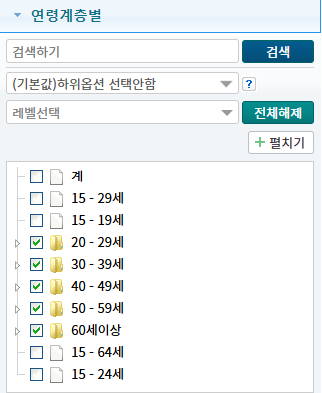

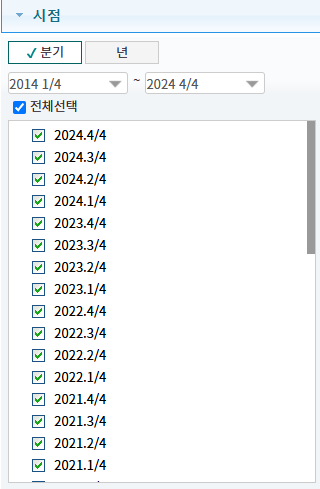

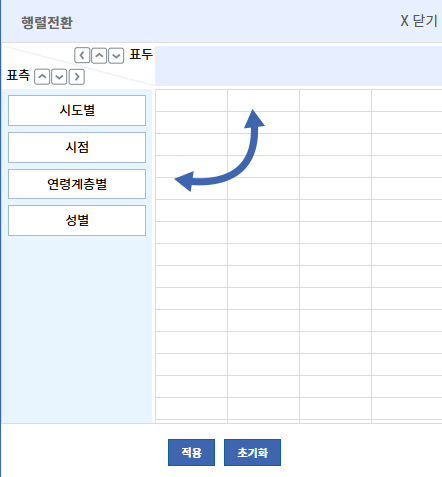

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import pandas as pd

Text(0.3, 0.3, '한글')

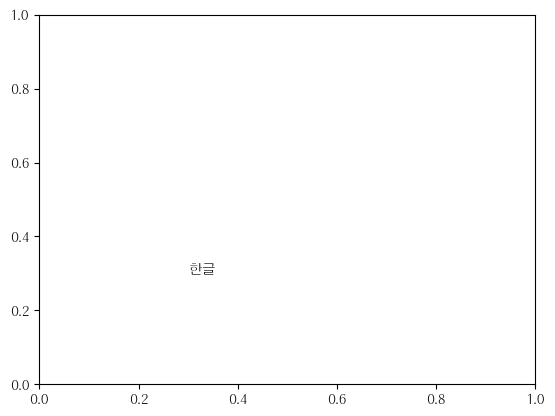

In [2]:
path = "C:\\Windows\\Fonts\\H2GPRM.TTF"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [3]:
# https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DB17%26obj_var_id%3D%26seqNo%3D%26tblId%3DDT_1DA7050S%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D101%26

In [4]:
file_path = './ref/행정구역시도성연령별취업자_20250304.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [5]:
# 깊은 복사를 통해 원본에 손상이 없음
ex_data = ori.copy()
ex_data.columns = ['resion','year','age','gender','value']
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시의 인구 수가  -로 표현되어 있어서 전처리 과정을 거침
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [6]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name='total')

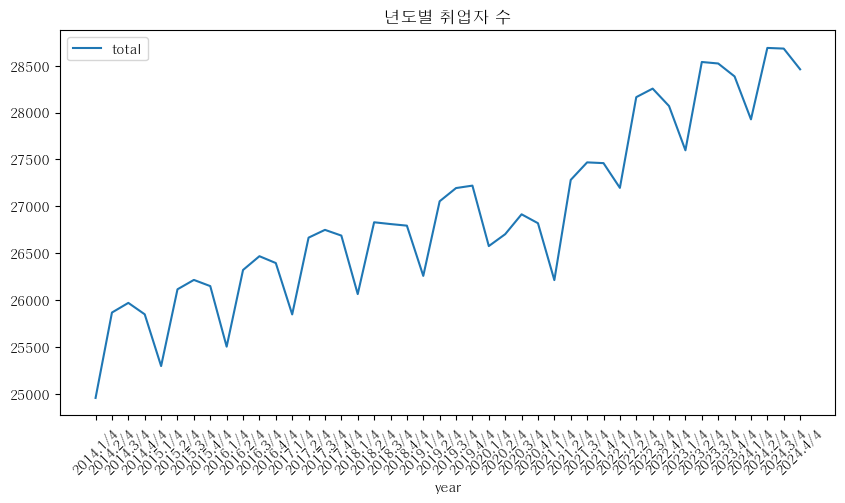

In [7]:
ax = ex1_data.plot(x='year', y='total', figsize=(10,5), title='년도별 취업자 수')
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [8]:
# def filter_gender(x):
#     return x['gender']=='남자'
# ex_data.filter(filter_gender)

m = ex_data.groupby('gender').get_group('남자')
wm = ex_data.groupby('gender').get_group('여자')
gender1 = pd.concat([m,wm], axis = 0)
gender1

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
2,서울특별시,2014.1/4,30 - 39세,남자,774
4,서울특별시,2014.1/4,40 - 49세,남자,773
6,서울특별시,2014.1/4,50 - 59세,남자,664
8,서울특별시,2014.1/4,60세이상,남자,352
...,...,...,...,...,...
7431,제주도,2024.4/4,20 - 29세,여자,17
7433,제주도,2024.4/4,30 - 39세,여자,29
7435,제주도,2024.4/4,40 - 49세,여자,44
7437,제주도,2024.4/4,50 - 59세,여자,47


In [9]:
ex2_data = ori.copy()
ex2_data.columns = ['resion','year','age','gender','value']
ex2_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시의 인구 수가  -로 표현되어 있어서 전처리 과정을 거침
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [10]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')

In [11]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

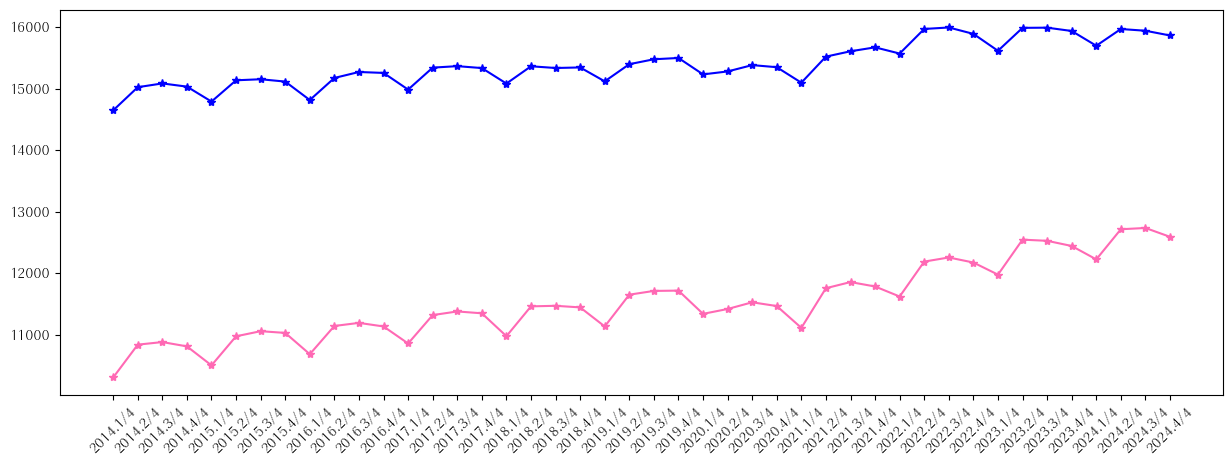

In [14]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color='blue',ls='-',marker='*')
plt.plot(female['year'],female['total'],label='여자',color='hotpink',ls='-',marker='*')
# ax는 여러개, 한개 모두 가능하지만 plt는 한개만 가능함
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()